In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
The dataset describes the chemical properties of glass and involves classifying samples of glass using their chemical properties as one of six classes. The dataset was credited to Vina Spiehler in 1987. The study of classification of types of glass was motivated by criminological investigation. At the scene of the crime, the glass left can be used as evidence...if it is correctly identified!

The chemical compositions are measured as the weight percent in corresponding oxide.
Attribute Information-
1.	 Id number: 1 to 214
2.	 RI: refractive index
3.	Na: Sodium (unit measurement: weight percent in corresponding oxide, as are attributes 4-10)
4.	Mg: Magnesium
5.	Al: Aluminum
6.	Si: Silicon
7.	K: Potassium
8.	Ca: Calcium
9.	Ba: Barium
10.	Fe: Iron
11.	Type of glass: (class attribute)
•	1- building_windows_float_processed
•	2- building_windows_non_float_processed
•	3- vehicle_windows_float_processed
•	4- vehicle_windows_non_float_processed (none in this database)
•	5- containers
•	6- tableware
•	7- headlamps
There are 214 observations in the dataset. The dataset can be divided into window glass (classes 1-4) and non-window glass (classes 5-7). 
Predict : Type of glass


In [2]:
df=pd.read_csv("https://raw.githubusercontent.com/dsrscientist/dataset3/main/glass.csv")
df

,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.00.1,1.1
0,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.00,1
1,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.00,1
2,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.00,1
3,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.00,1
4,6,1.51596,12.79,3.61,1.62,72.97,0.64,8.07,0.00,0.26,1
...,...,...,...,...,...,...,...,...,...,...,...
208,210,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.00,7
209,211,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.00,7
210,212,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.00,7
211,213,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.00,7


In [3]:
df.head(50)

,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.00.1,1.1
0,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.00,1
1,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.00,1
2,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.00,1
3,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.00,1
4,6,1.51596,12.79,3.61,1.62,72.97,0.64,8.07,0.00,0.26,1
5,7,1.51743,13.30,3.60,1.14,73.09,0.58,8.17,0.00,0.00,1
6,8,1.51756,13.15,3.61,1.05,73.24,0.57,8.24,0.00,0.00,1
7,9,1.51918,14.04,3.58,1.37,72.08,0.56,8.30,0.00,0.00,1
8,10,1.51755,13.00,3.60,1.36,72.99,0.57,8.40,0.00,0.11,1
9,11,1.51571,12.72,3.46,1.56,73.20,0.67,8.09,0.00,0.24,1


In [4]:
df.tail(50)

,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.00.1,1.1
163,165,1.51915,12.73,1.85,1.86,72.69,0.60,10.09,0.00,0.00,5
164,166,1.52171,11.56,1.88,1.56,72.86,0.47,11.41,0.00,0.00,5
165,167,1.52151,11.03,1.71,1.56,73.44,0.58,11.62,0.00,0.00,5
166,168,1.51969,12.64,0.00,1.65,73.75,0.38,11.53,0.00,0.00,5
167,169,1.51666,12.86,0.00,1.83,73.88,0.97,10.17,0.00,0.00,5
168,170,1.51994,13.27,0.00,1.76,73.03,0.47,11.32,0.00,0.00,5
169,171,1.52369,13.44,0.00,1.58,72.22,0.32,12.24,0.00,0.00,5
170,172,1.51316,13.02,0.00,3.04,70.48,6.21,6.96,0.00,0.00,5
171,173,1.51321,13.00,0.00,3.02,70.70,6.21,6.93,0.00,0.00,5
172,174,1.52043,13.38,0.00,1.40,72.25,0.33,12.50,0.00,0.00,5


In [5]:
df.isnull().sum()

1          0
1.52101    0
13.64      0
4.49       0
1.10       0
71.78      0
0.06       0
8.75       0
0.00       0
0.00.1     0
1.1        0
dtype: int64

<AxesSubplot:>

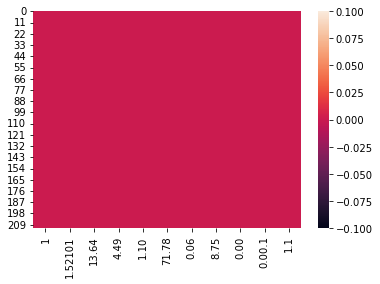

In [6]:
sns.heatmap(df.isnull())

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 213 entries, 0 to 212
Data columns (total 11 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   1        213 non-null    int64  
 1   1.52101  213 non-null    float64
 2   13.64    213 non-null    float64
 3   4.49     213 non-null    float64
 4   1.10     213 non-null    float64
 5   71.78    213 non-null    float64
 6   0.06     213 non-null    float64
 7   8.75     213 non-null    float64
 8   0.00     213 non-null    float64
 9   0.00.1   213 non-null    float64
 10  1.1      213 non-null    int64  
dtypes: float64(9), int64(2)
memory usage: 18.4 KB


In [8]:
df.shape

(213, 11)

In [9]:
df.dtypes

1            int64
1.52101    float64
13.64      float64
4.49       float64
1.10       float64
71.78      float64
0.06       float64
8.75       float64
0.00       float64
0.00.1     float64
1.1          int64
dtype: object

In [10]:
names=['Id','RI','Na','Mg','Al','Si','K','Ca','Ba','Fe','glass_type']
df.columns = names
df

,Id,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,glass_type
0,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.00,1
1,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.00,1
2,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.00,1
3,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.00,1
4,6,1.51596,12.79,3.61,1.62,72.97,0.64,8.07,0.00,0.26,1
...,...,...,...,...,...,...,...,...,...,...,...
208,210,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.00,7
209,211,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.00,7
210,212,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.00,7
211,213,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.00,7


In [11]:
for i in df.columns:
    print(df[i].value_counts())
    print('\n')

2      1
136    1
138    1
139    1
140    1
      ..
76     1
77     1
78     1
79     1
214    1
Name: Id, Length: 213, dtype: int64


1.52152    3
1.51590    3
1.51645    3
1.51761    2
1.51613    2
          ..
1.51625    1
1.51569    1
1.51605    1
1.51588    1
1.51651    1
Name: RI, Length: 177, dtype: int64


13.21    5
13.02    5
13.00    5
12.85    4
12.86    4
        ..
13.34    1
13.31    1
14.17    1
13.51    1
14.23    1
Name: Na, Length: 142, dtype: int64


0.00    42
3.48     8
3.58     8
3.54     8
3.52     7
        ..
3.46     1
3.73     1
3.97     1
3.89     1
1.78     1
Name: Mg, Length: 93, dtype: int64


1.54    8
1.19    6
1.56    5
1.29    5
1.43    5
       ..
1.61    1
0.88    1
1.05    1
0.65    1
1.94    1
Name: Al, Length: 117, dtype: int64


72.99    4
73.10    4
72.86    4
73.28    4
73.11    4
        ..
70.57    1
73.81    1
72.92    1
73.55    1
73.61    1
Name: Si, Length: 132, dtype: int64


0.00    30
0.57    12
0.56    11
0.60    11
0.58    10
   

# observation
from above running code there are observations mention below
1.there are no null values present in the data set
2.we have check no white spaces present in the dataset.so we can conclude that dataset is clean
3.we have assin the column name in the data set according to the statement
4.we have check the data types
5.in glass_type column there are unique value present in dataset which conclude that 1-3 are defined as window glass
  and 5-7 are non window glass
6.Also we will remove the unnecessary column which is product id which is of no use

In [12]:
df.drop('Id',axis=1,inplace=True)

<AxesSubplot:xlabel='glass_type', ylabel='count'>

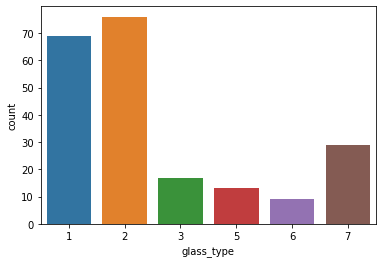

In [13]:
sns.countplot(x='glass_type',data=df)

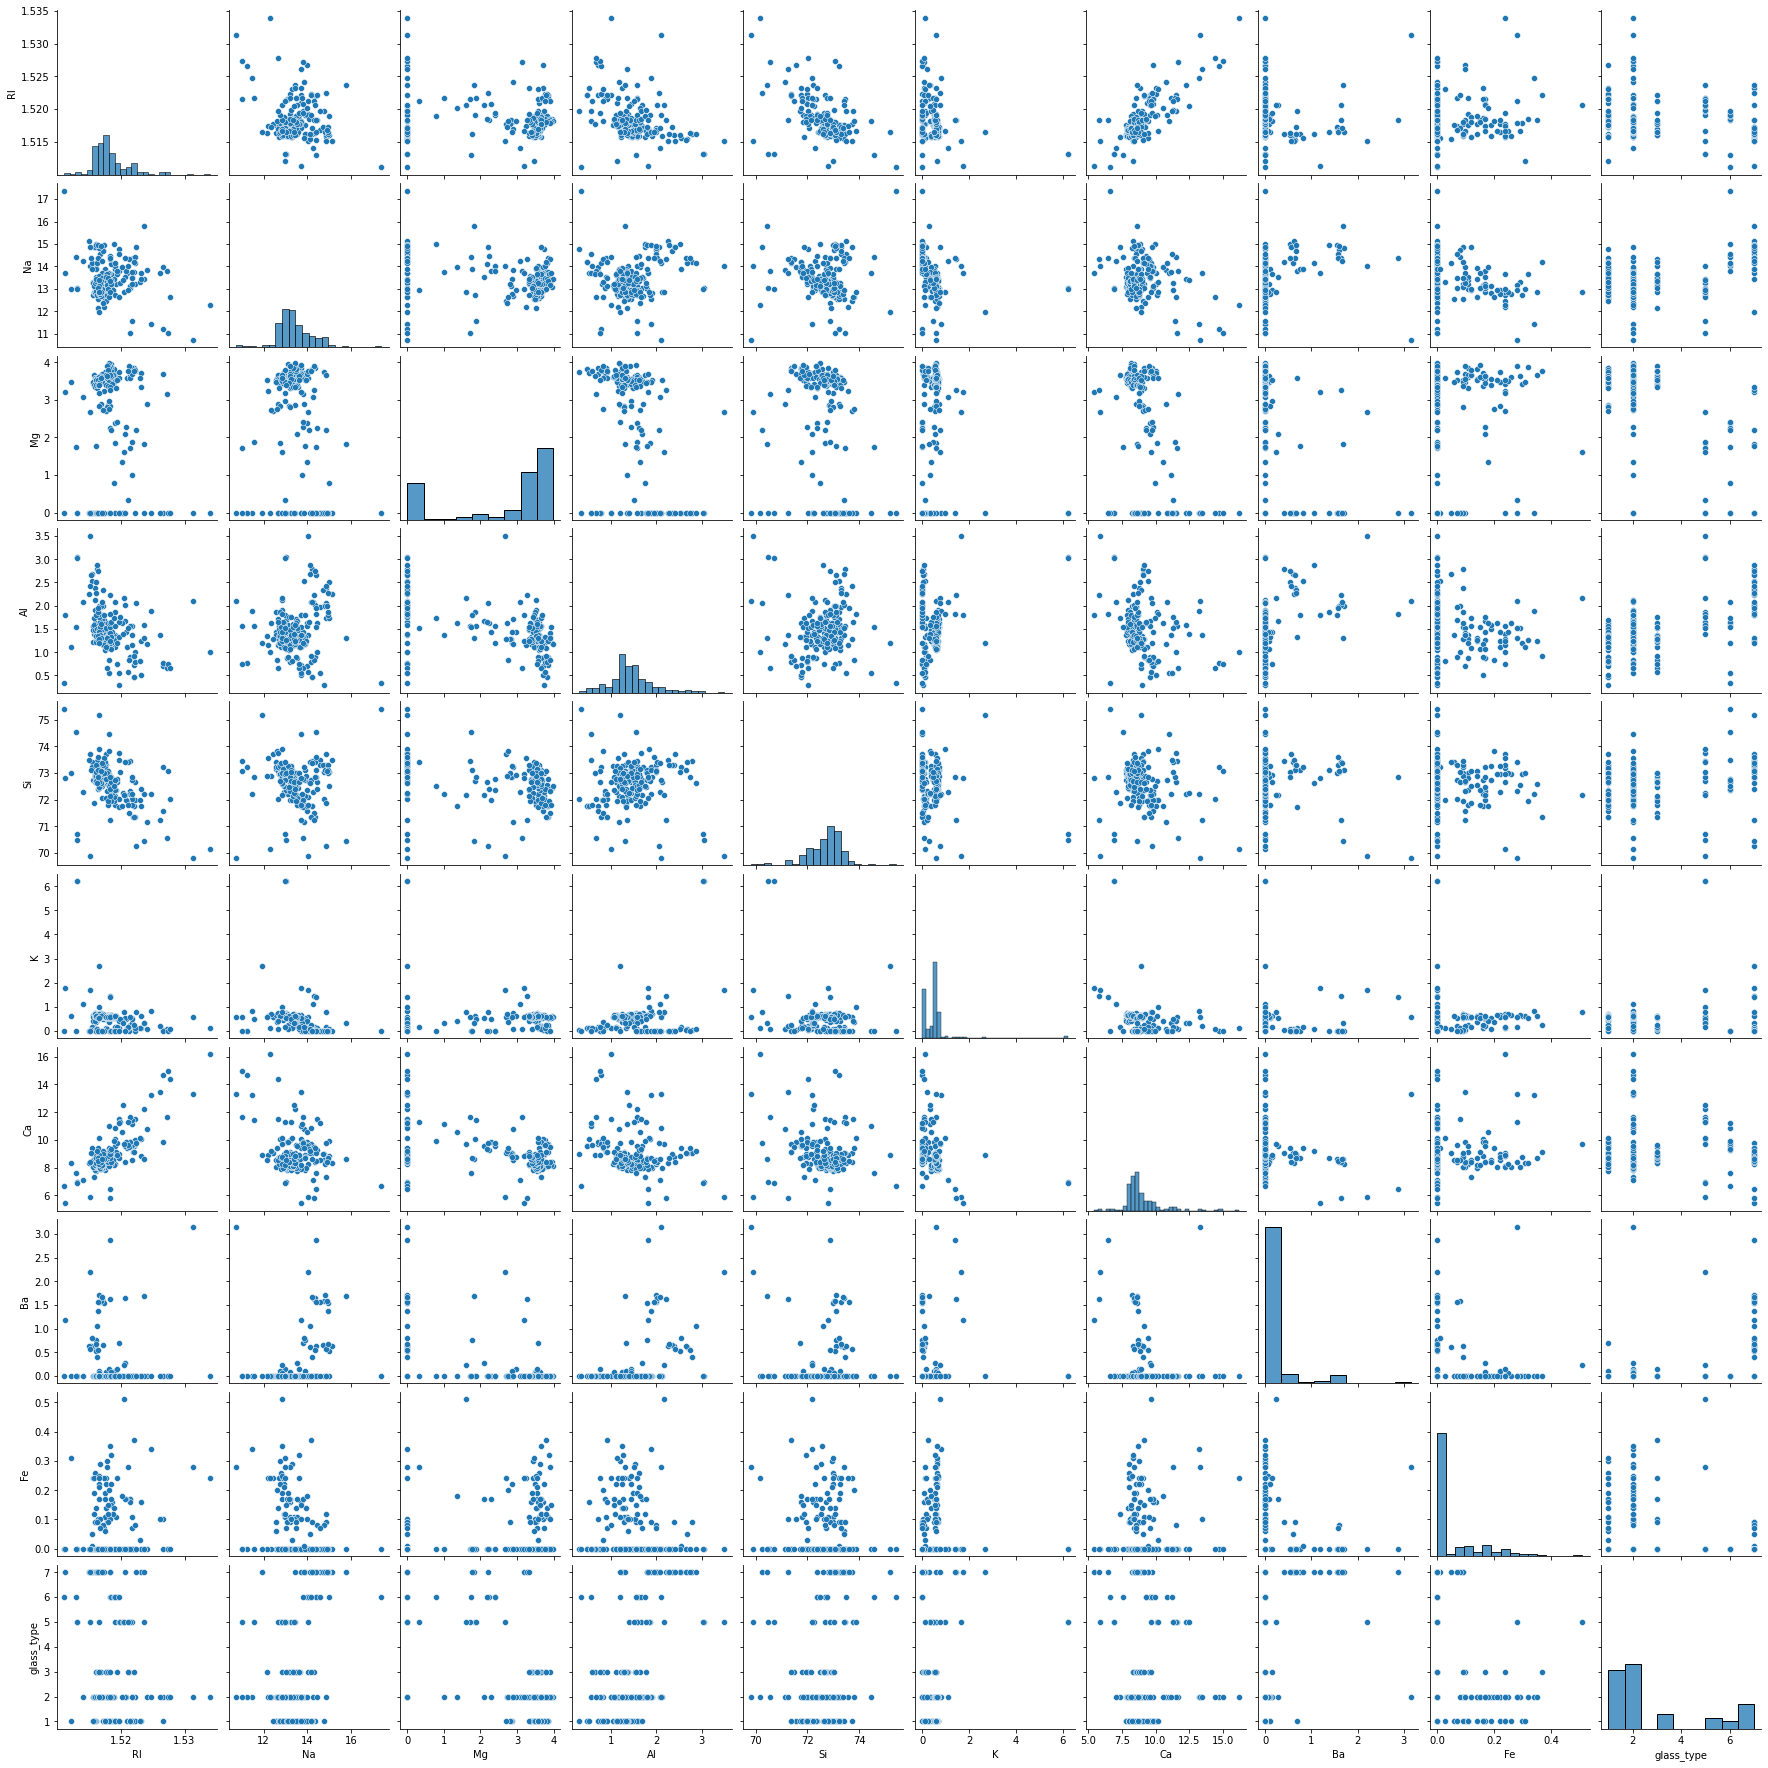

In [14]:
sns.pairplot(data=df)

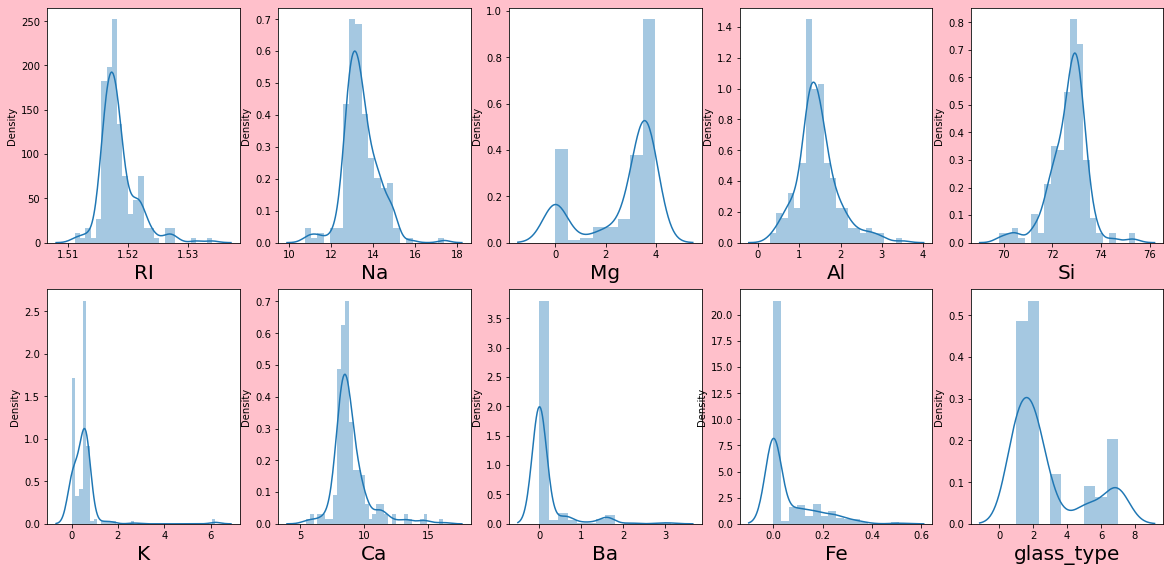

In [15]:
plt.figure(figsize=(20,25),facecolor='pink')
plotnumber=1
for columns in df.columns:
    if plotnumber<=10:
        ax=plt.subplot(5,5,plotnumber)
        sns.distplot(df[columns])
        plt.xlabel(columns,fontsize=20)
    plotnumber+=1
plt.show()

In [16]:
df['glass_type'].value_counts()

2    76
1    69
7    29
3    17
5    13
6     9
Name: glass_type, dtype: int64

# obsrvation
from the observation we can say that data is equally distributed except some columns
that id Ba.Fe,K which is clearly state that data is right skewed or may be otliers were present in the data set
let's check

In [17]:
df.skew()

RI            1.639658
Na            0.457318
Mg           -1.154323
Al            0.900017
Si           -0.744546
K             6.549276
Ca            2.040591
Ba            3.406749
Fe            1.747173
glass_type    1.108861
dtype: float64

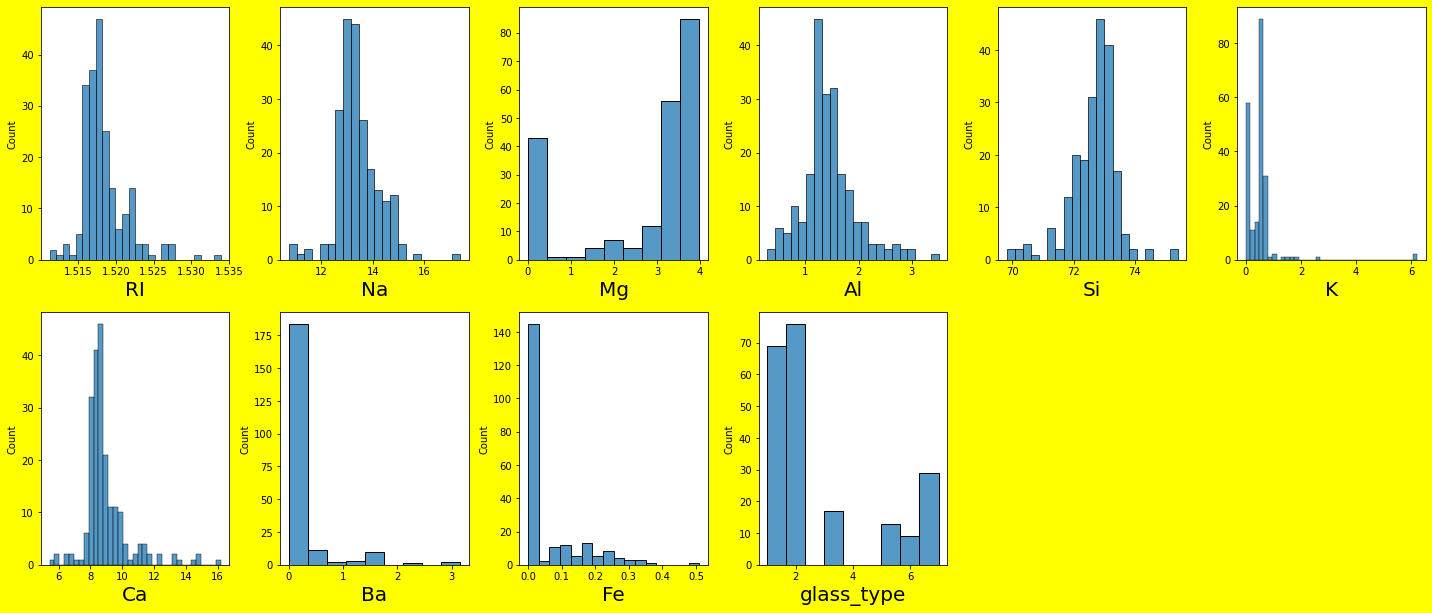

In [18]:
plt.figure(figsize=(20,25),facecolor='yellow')
plotnumber=1
for column in df:
    if plotnumber<=12:
        ax=plt.subplot(6,6,plotnumber)
        sns.histplot(df[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.tight_layout()
plt.show()

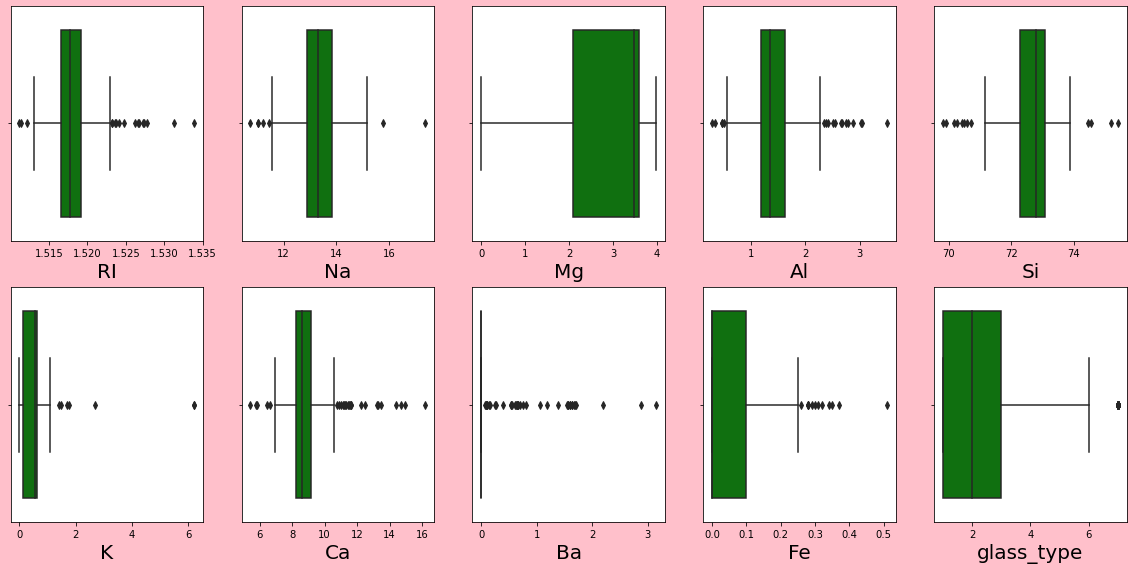

In [19]:
plt.figure(figsize=(20,25),facecolor='pink')
graph=1
for columns in df.columns:
    if graph<=10:
        ax=plt.subplot(5,5,graph)
        sns.boxplot(df[columns],color='green')
        plt.xlabel(columns,fontsize=20)
    graph+=1
plt.show()

In [20]:
df.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,glass_type
count,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000
mean,1.518353,13.406761,2.676056,1.446526,72.655023,0.499108,8.957934,0.175869,0.057277,2.788732
std,0.003039,0.818371,1.440453,0.499882,0.774052,0.653035,1.426435,0.498245,0.097589,2.105130
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516520,12.900000,2.090000,1.190000,72.280000,0.130000,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.560000,8.600000,0.000000,0.000000,2.000000
75%,1.519150,13.830000,3.600000,1.630000,73.090000,0.610000,9.180000,0.000000,0.100000,3.000000
max,1.533930,17.380000,3.980000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


In [21]:
q1=df.quantile(0.25)
q3=df.quantile(0.75)
iqr=q3-q1

In [22]:
ch=(q3.Ca+(1.5*iqr.Ca))
ch

10.59

In [23]:
CH=np.where(df['Ca']>ch)
CH

(array([102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 129, 130, 164,
        165, 166, 168, 169, 172, 174, 181, 182], dtype=int64),)

In [24]:
df=df.drop(df.index[CH])
df

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,glass_type
0,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.00,1
1,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.00,1
2,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.00,1
3,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.00,1
4,1.51596,12.79,3.61,1.62,72.97,0.64,8.07,0.00,0.26,1
...,...,...,...,...,...,...,...,...,...,...
208,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.00,7
209,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.00,7
210,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.00,7
211,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.00,7


In [25]:
df.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,glass_type
count,192.000000,192.000000,192.000000,192.000000,192.000000,192.000000,192.000000,192.000000,192.000000,192.000000
mean,1.517765,13.468958,2.911563,1.464375,72.685521,0.527500,8.582083,0.178698,0.056667,2.723958
std,0.002211,0.739941,1.277454,0.498526,0.708154,0.677671,0.750215,0.475378,0.095853,2.142037
min,1.511150,11.950000,0.000000,0.290000,69.890000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516450,12.937500,2.865000,1.197500,72.355000,0.160000,8.210000,0.000000,0.000000,1.000000
50%,1.517540,13.300000,3.500000,1.365000,72.810000,0.560000,8.545000,0.000000,0.000000,2.000000
75%,1.518473,13.882500,3.612500,1.630000,73.082500,0.610000,8.952500,0.000000,0.100000,3.000000
max,1.526670,17.380000,3.980000,3.500000,75.410000,6.210000,10.560000,2.880000,0.510000,7.000000


In [26]:
df.skew()

RI            0.632821
Na            1.338342
Mg           -1.626759
Al            1.007413
Si           -0.531289
K             6.402339
Ca           -0.675286
Ba            3.049868
Fe            1.779246
glass_type    1.187935
dtype: float64

In [27]:
fe=(q3.K+(1.5*iqr.K))
fe

1.33

In [28]:
FE=np.where(df['K']>fe)

In [29]:
FE

(array([150, 153, 154, 163, 164, 179, 185], dtype=int64),)

In [30]:
df=df.drop(df.index[FE])

In [31]:
df.reset_index()

,index,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,glass_type
0,0,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.00,1
1,1,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.00,1
2,2,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.00,1
3,3,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.00,1
4,4,1.51596,12.79,3.61,1.62,72.97,0.64,8.07,0.00,0.26,1
...,...,...,...,...,...,...,...,...,...,...,...
180,208,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.00,7
181,209,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.00,7
182,210,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.00,7
183,211,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.00,7


In [32]:
df.skew()

RI            0.859664
Na            1.438171
Mg           -1.764826
Al            0.651741
Si           -0.329776
K            -0.598136
Ca            0.484769
Ba            2.998235
Fe            1.723079
glass_type    1.349992
dtype: float64

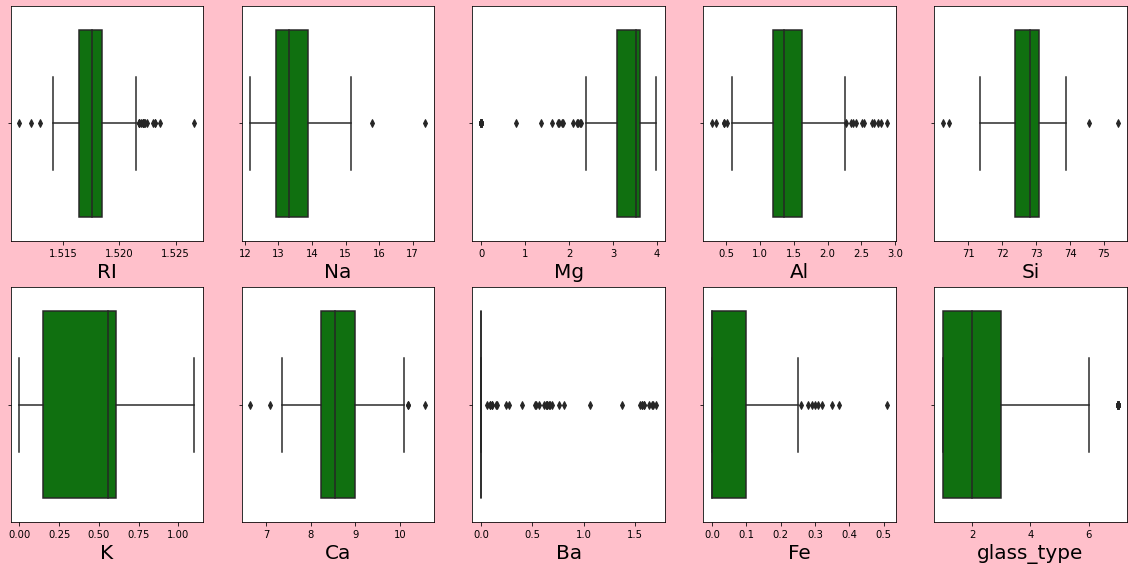

In [33]:
plt.figure(figsize=(20,25),facecolor='pink')
graph=1
for columns in df.columns:
    if graph<=10:
        ax=plt.subplot(5,5,graph)
        sns.boxplot(df[columns],color='green')
        plt.xlabel(columns,fontsize=20)
    graph+=1
plt.show()

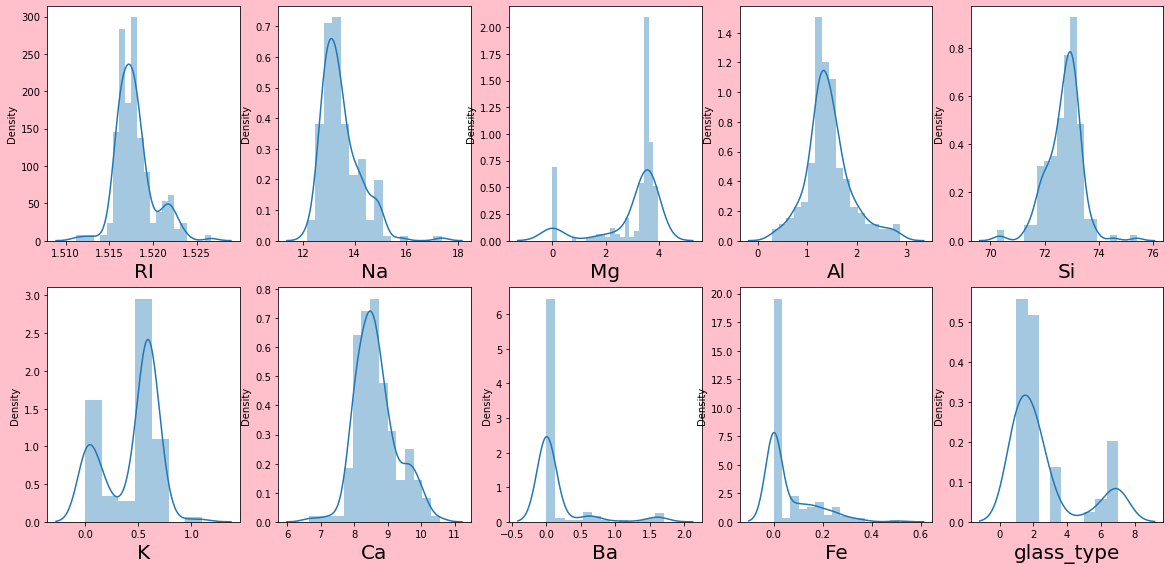

In [34]:
plt.figure(figsize=(20,25),facecolor='pink')
plotnumber=1
for columns in df.columns:
    if plotnumber<=10:
        ax=plt.subplot(5,5,plotnumber)
        sns.distplot(df[columns])
        plt.xlabel(columns,fontsize=20)
    plotnumber+=1
plt.show()

# now the data look good but there is imbalanced class in the glass_type as there are more number of 1 and 2 were present which
we can see above

In [35]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score

In [36]:
df.corr()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,glass_type
RI,1.000000,0.043316,0.250113,-0.466862,-0.728626,-0.215188,0.688173,-0.076728,0.080900,-0.181789
Na,0.043316,1.000000,-0.623115,0.215923,-0.128541,-0.708096,0.044843,0.547146,-0.232361,0.656019
Mg,0.250113,-0.623115,1.000000,-0.693369,-0.360913,0.539858,-0.168359,-0.769755,0.128185,-0.874930
Al,-0.466862,0.215923,-0.693369,1.000000,0.272091,-0.083508,-0.144340,0.503882,-0.100535,0.651807
Si,-0.728626,-0.128541,-0.360913,0.272091,1.000000,0.034771,-0.436008,0.143494,-0.066809,0.199297
K,-0.215188,-0.708096,0.539858,-0.083508,0.034771,1.000000,-0.368720,-0.525886,0.159493,-0.555018
Ca,0.688173,0.044843,-0.168359,-0.144340,-0.436008,-0.368720,1.000000,0.012678,0.112848,0.112122
Ba,-0.076728,0.547146,-0.769755,0.503882,0.143494,-0.525886,0.012678,1.000000,-0.129287,0.715023
Fe,0.080900,-0.232361,0.128185,-0.100535,-0.066809,0.159493,0.112848,-0.129287,1.000000,-0.163034
glass_type,-0.181789,0.656019,-0.874930,0.651807,0.199297,-0.555018,0.112122,0.715023,-0.163034,1.000000


<AxesSubplot:>

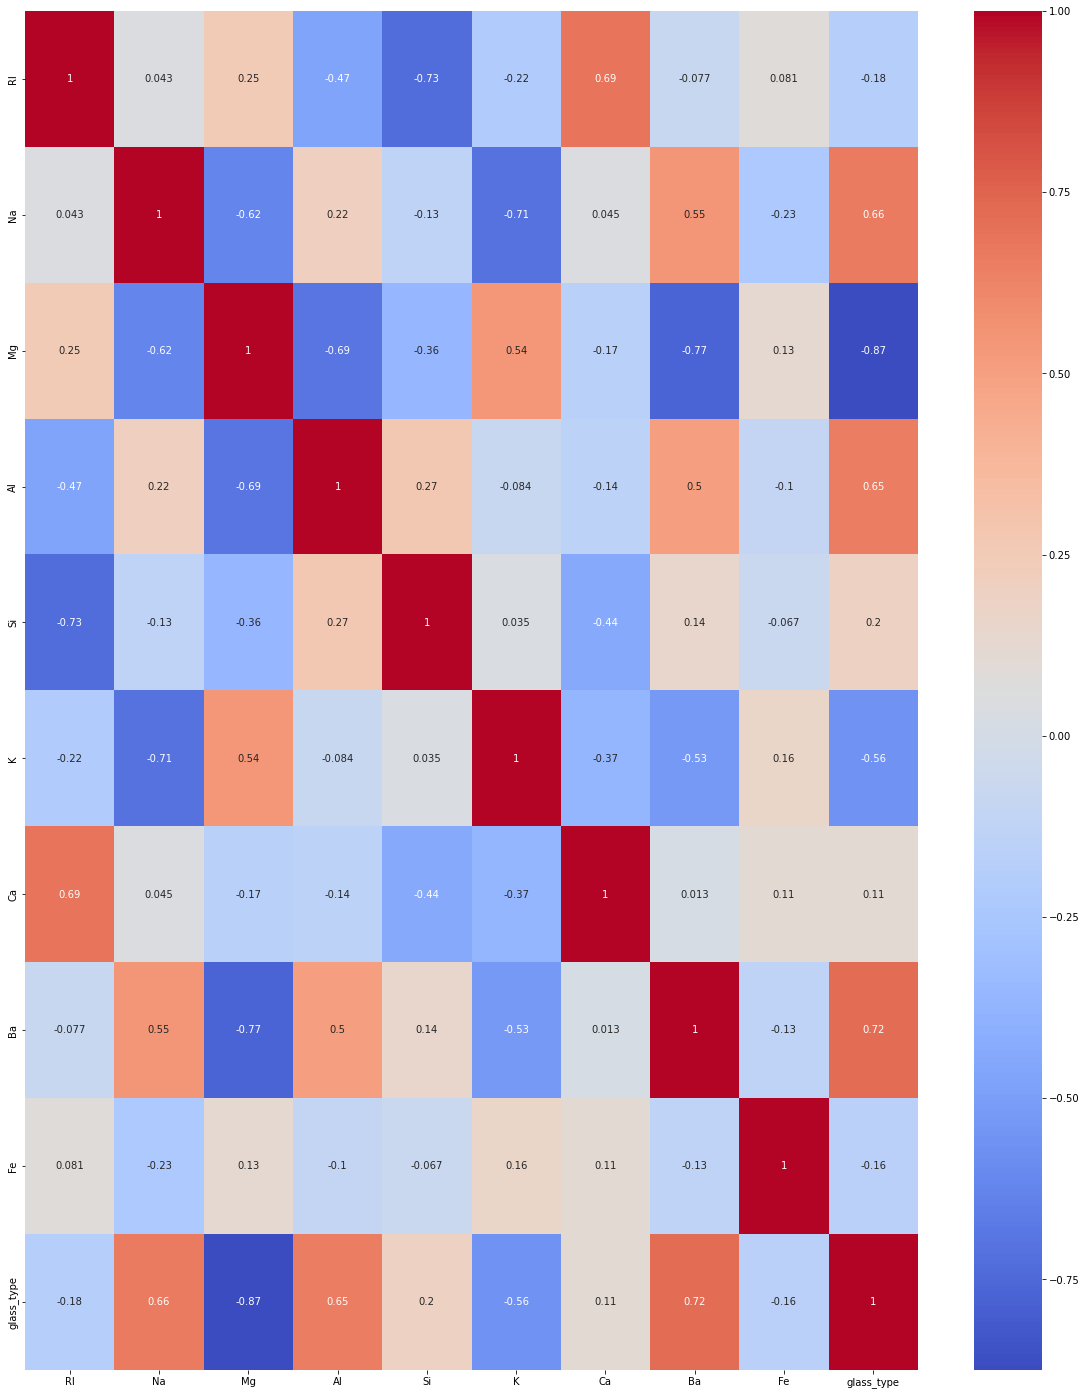

In [37]:
data=df.corr()
plt.figure(figsize=(20,25))
sns.heatmap(data,annot=True,cmap='coolwarm')

In [38]:
X=df.drop(['glass_type'],axis=1)
Y=df['glass_type']

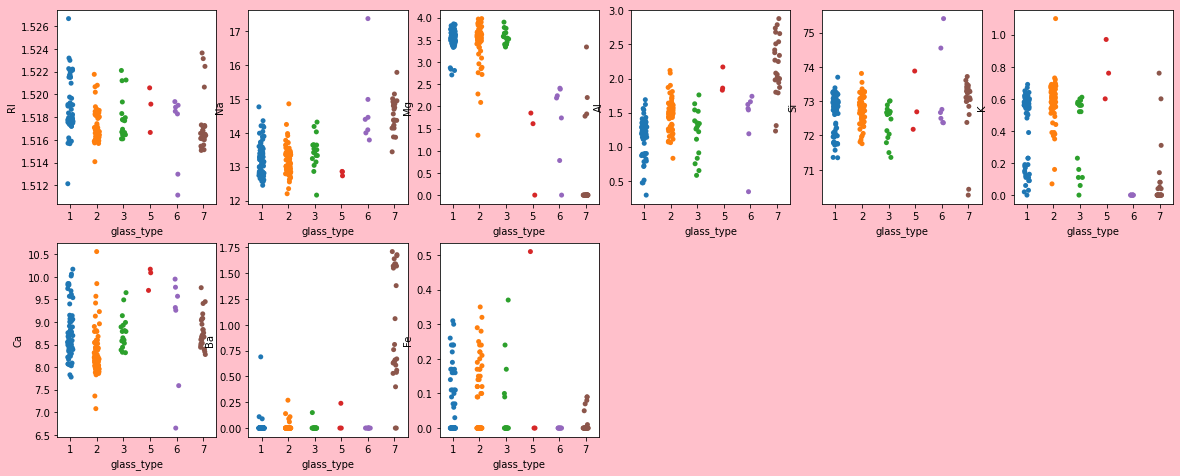

In [39]:
plt.figure(figsize=(20,25),facecolor='pink')
plotnumber = 1

for column in X:
    if plotnumber<=12:
        ax = plt.subplot(6,6,plotnumber)
        sns.stripplot(Y,X[column])
       
    plotnumber+=1
plt.show()

In [40]:
X.shape

(185, 9)

In [41]:
Y.shape

(185,)

In [42]:
scaler=StandardScaler()
X_Scaled=scaler.fit_transform(X)

In [43]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=82, test_size=.25)
print('Training feature matrix size:',X_train.shape)
print('Training target vector size:',Y_train.shape)
print('Test feature matrix size:',X_test.shape)
print('Test target vector size:',Y_test.shape)

Training feature matrix size: (138, 9)
Training target vector size: (138,)
Test feature matrix size: (47, 9)
Test target vector size: (47,)


In [44]:
maxAccu=0
maxRS=0
for i in range(50,300):
    X_train,X_test,Y_train,Y_test = train_test_split(X_Scaled,Y,test_size = 0.3, random_state=i)
    log_reg=LogisticRegression()
    log_reg.fit(X_train,Y_train)
    y_pred=log_reg.predict(X_test)
    acc=accuracy_score(Y_test,y_pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print('Best accuracy is', maxAccu ,'on Random_state', maxRS)

Best accuracy is 0.8214285714285714 on Random_state 293


In [46]:
X_train, X_test, Y_train, Y_test = train_test_split(X_Scaled, Y, random_state=293, test_size=.25)
log_reg=LogisticRegression()
log_reg.fit(X_train,Y_train)
y_pred=log_reg.predict(X_test)
print('\033[1m'+'Logistics Regression Evaluation'+'\033[0m')
print('\n')
print('\033[1m'+'Accuracy Score of Logistics Regression :'+'\033[0m', accuracy_score(Y_test, y_pred))
print('\n')
print('\033[1m'+'Confusion matrix of Logistics Regression :'+'\033[0m \n',confusion_matrix(Y_test, y_pred))

Logistics Regression Evaluation


Accuracy Score of Logistics Regression : 0.851063829787234


Confusion matrix of Logistics Regression : 
 [[16  0  2  0  0]
 [ 4 16  0  0  0]
 [ 1  0  0  0  0]
 [ 0  0  0  1  0]
 [ 0  0  0  0  7]]


In [47]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [48]:
dtc=DecisionTreeClassifier()
dtc.fit(X_train,Y_train)
y_pred=dtc.predict(X_test)
print('\033[1m'+'Decision Tree Classifier Evaluation'+'\033[0m')
print('\n')
print('\033[1m'+'Accuracy Score of Decision Tree Classifier :'+'\033[0m', accuracy_score(Y_test, y_pred))
print('\n')
print('\033[1m'+'Confusion matrix of Decision Tree Classifier :'+'\033[0m \n',confusion_matrix(Y_test, y_pred))

Decision Tree Classifier Evaluation


Accuracy Score of Decision Tree Classifier : 0.7872340425531915


Confusion matrix of Decision Tree Classifier : 
 [[14  1  2  0  1]
 [ 4 14  2  0  0]
 [ 0  0  1  0  0]
 [ 0  0  0  1  0]
 [ 0  0  0  0  7]]


In [49]:
rfc=RandomForestClassifier()
rfc.fit(X_train,Y_train)
y_pred=rfc.predict(X_test)
print('\033[1m'+'Random Forest Classifier'+'\033[0m')
print('\n')
print('\033[1m'+'Accuracy Score of Random Forest Classifier :'+'\033[0m', accuracy_score(Y_test, y_pred))
print('\n')
print('\033[1m'+'Confusion matrix of Random Forest Classifier :'+'\033[0m \n',confusion_matrix(Y_test, y_pred))
print('\n')

Random Forest Classifier


Accuracy Score of Random Forest Classifier : 0.8936170212765957


Confusion matrix of Random Forest Classifier : 
 [[16  1  1  0  0]
 [ 2 18  0  0  0]
 [ 0  0  1  0  0]
 [ 0  1  0  0  0]
 [ 0  0  0  0  7]]




In [50]:
adbc=AdaBoostClassifier()
adbc.fit(X_train,Y_train)
y_pred=adbc.predict(X_test)
print('\033[1m'+'AdaBoost Classifier Evaluation'+'\033[0m')
print('\n')
print('\033[1m'+'Accuracy Score of AdaBoost Classifier :'+'\033[0m', accuracy_score(Y_test, y_pred))
print('\n')
print('\033[1m'+'Confusion matrix of AdaBoost Classifier :'+'\033[0m \n',confusion_matrix(Y_test, y_pred))
print('\n')

AdaBoost Classifier Evaluation


Accuracy Score of AdaBoost Classifier : 0.5106382978723404


Confusion matrix of AdaBoost Classifier : 
 [[17  0  0  0  1]
 [20  0  0  0  0]
 [ 1  0  0  0  0]
 [ 1  0  0  0  0]
 [ 0  0  0  0  7]]


